In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
# E01: Trigram
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    trigram = (ch1, ch2, ch3)
    b[trigram] = b.get(trigram, 0) + 1

In [9]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', 'h', '<E>'), 1714),
 (('n', 'a', '<E>'), 1673),
 (('a', 'n', '<E>'), 1509),
 (('o', 'n', '<E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '<E>'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '<E>'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '<E>'), 903),
 (('i', 'e', '<E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '<E>'), 766),
 (('e', 'l', '<E>'), 727),
 (('y', 'a', '<E>'), 716),
 (('a', 'n', 'i'), 703),
 (('<S>', 'd', 'a'), 700),
 (('l', 'a', '<E>'), 684),
 (('e', 'r', '<E>'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('<S>', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('<S>', 'a', 'l'), 632),
 (('<S>', 'c', 'a'), 628),
 (('r', 'a', '<E>'), 627),
 (('n', 'i', '<E>'), 625),
 (('<S>', 'a', 'n'), 623),
 (('n', 'n', '<E>'), 619),
 (('n', 'e', '<E>'), 607),
 (('e', 'e', '<E>'), 605),
 (('e', 'y', '<

In [10]:
import torch

In [11]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [12]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1

N = N.view(-1, N.shape[2])
    

In [13]:
import math

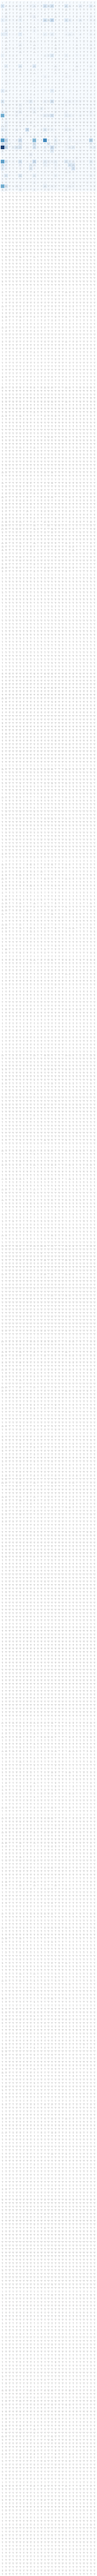

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16*16))
plt.imshow(N[27*4:27*6, :], cmap='Blues')
for i in range(27*27):
    for j in range(27):
        i1, i2 = divmod(i, 27)
        chstr = itos[i1] + itos[i2] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [15]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [16]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [17]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [18]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [19]:
import torch
import torch.nn.functional as F

In [20]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [21]:
# E02: Split dataset into train, dev and test
# create the dataset
xs1, xs2, xs, ys = [], [], [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    #print(ch1, ch2, ch3)
    xs1.append(ix1)
    xs2.append(ix2)
    ys.append(ix3)

xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
xs = torch.stack((xs1, xs2), dim=1)
ys = torch.tensor(ys)
print('xs1.shape', xs1.size())
num = xs1.nelement()

train_size = int(num * 0.8)
dev_size = int(num * 0.1)
test_size = num - train_size - dev_size

shuffled_indices = torch.randperm(num) 
xs = xs[shuffled_indices]
ys = ys[shuffled_indices]

train_x = xs[: train_size]
dev_x = xs[train_size : train_size + dev_size]
test_x = xs[train_size + dev_size : ]

train_y = ys[: train_size]
dev_y = ys[train_size : train_size + dev_size]
test_y = ys[train_size + dev_size : ]

train_x.size()

xs1.shape torch.Size([196113])


torch.Size([156890, 2])

In [22]:
train_x[5]

tensor([9, 1])

In [23]:
print('number of examples: ', num)

#xs = xs.view(-1)
print('xs.shape:', xs.size())

number of examples:  196113
xs.shape: torch.Size([196113, 2])


In [68]:
mini_x = train_x[:2]
mini_x

tensor([[18,  9],
        [ 9, 19]])

In [ ]:
mini_x = F.one_hot(mini_x, num_classes=27*28)

In [105]:
# E03: Tune hyperparameters
# gradient descent
regs = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
lr_rates = [1e1, 5E1, 1e2]
g = torch.Generator().manual_seed(2147483647)
lowest_train_loss = 10.0
lowest_dev_loss = 10.0

for reg in regs:
  for lr in lr_rates:
    # initialize the 'network'
    W = torch.randn((54, 27), generator=g, requires_grad=True)
    for k in range(20):
      # forward pass
      xenc_train = F.one_hot(train_x, num_classes=27).float() # input to the network: one-hot encoding
      #print(f'xenc_train.shape: {xenc_train.size()}')
      xenc_train = xenc_train.view(len(train_x), -1)
      logits_train = xenc_train @ W # predict log-counts
      counts_train = logits_train.exp() # counts, equivalent to N
      probs_train = counts_train / counts_train.sum(1, keepdims=True) # probabilities for next character
      loss_train = -probs_train[torch.arange(len(train_x)), train_y].log().mean() + reg*(W**2).mean()
      #print(f'    reg={reg}, lr={lr}: loss_train={loss_train}')
      # backward pass
      W.grad = None # set to zero the gradient
      loss_train.backward()
      # update
      W.data += -lr * W.grad
    
    xenc_dev = F.one_hot(dev_x, num_classes=27).float() # input to the network: one-hot encoding
    xenc_dev = xenc_dev.view(len(dev_x), -1)
    logits_dev = xenc_dev @ W # predict log-counts
    counts_dev = logits_dev.exp() # counts, equivalent to N
    probs_dev = counts_dev / counts_dev.sum(1, keepdims=True) # probabilities for next character
    loss_dev = -probs_dev[torch.arange(len(dev_x)), dev_y].log().mean() + reg*(W**2).mean()

    if loss_train < lowest_train_loss:
      best_reg = reg
      best_lr = lr
      lowest_train_loss = loss_train
      lowest_dev_loss = loss_dev

    print(f'reg={reg}, lr={lr}: loss_train={loss_train}, loss_dev={loss_dev}')

print('Best model is:')
print(f'best_reg={best_reg}, best_lr={best_lr}: loss_train={lowest_train_loss}, loss_dev={lowest_dev_loss}')

reg=1e-07, lr=10.0: loss_train=2.8031539916992188, loss_dev=2.7862043380737305
reg=1e-07, lr=50.0: loss_train=2.388005256652832, loss_dev=2.3937880992889404
reg=1e-07, lr=100.0: loss_train=2.6282782554626465, loss_dev=2.5597891807556152
reg=1e-06, lr=10.0: loss_train=2.834681510925293, loss_dev=2.8214266300201416
reg=1e-06, lr=50.0: loss_train=2.3875033855438232, loss_dev=2.390437602996826
reg=1e-06, lr=100.0: loss_train=2.500066041946411, loss_dev=2.6024742126464844
reg=1e-05, lr=10.0: loss_train=2.773715019226074, loss_dev=2.758812665939331
reg=1e-05, lr=50.0: loss_train=2.3801376819610596, loss_dev=2.381762981414795
reg=1e-05, lr=100.0: loss_train=2.552072525024414, loss_dev=2.828319549560547
reg=0.0001, lr=10.0: loss_train=2.8116698265075684, loss_dev=2.7945382595062256
reg=0.0001, lr=50.0: loss_train=2.3867228031158447, loss_dev=2.3887693881988525
reg=0.0001, lr=100.0: loss_train=2.5017495155334473, loss_dev=2.7472550868988037
reg=0.001, lr=10.0: loss_train=2.8269832134246826, los

In [74]:
print(f'best_reg={best_reg}, best_lr={best_lr}: loss_train={lowest_train_loss:.4f}, loss_dev={lowest_dev_loss:.4f}')

best_reg=0.001, best_lr=50.0: loss_train=2.3779, loss_dev=2.3797


In [119]:
# Obtain best model
W = torch.randn((54, 27), generator=g, requires_grad=True)
for k in range(20):
    # forward pass
    xenc_train = F.one_hot(train_x, num_classes=27).float() # input to the network: one-hot encoding
    #print(f'xenc_train.shape: {xenc_train.size()}')
    xenc_train = xenc_train.view(len(train_x), -1)
    logits_train = xenc_train @ W # predict log-counts
    counts_train = logits_train.exp() # counts, equivalent to N
    probs_train = counts_train / counts_train.sum(1, keepdims=True) # probabilities for next character
    loss_train = -probs_train[torch.arange(len(train_x)), train_y].log().mean() + best_reg*(W**2).mean()
    #print(f'    reg={reg}, lr={lr}: loss_train={loss_train}')
    # backward pass
    W.grad = None # set to zero the gradient
    loss_train.backward()
    # update
    W.data += -best_lr * W.grad

loss_dev is close to loss_train, but not much. Best model is obtained with regularization strength of 0.001, learning rate of 50. The lowest train loss obtain is 2.3779 with a validation loss of 2.3797.

In [50]:
mini_x = train_x[:5, :]
mini_x = mini_x.view(-1)
mini_x

tensor([18,  9,  9, 19,  4,  5,  5, 14, 14, 15])

In [47]:
W

tensor([[ 2.0230,  1.8756, -1.2037, -0.8888, -0.1946,  1.4322, -1.4698, -1.0826,
          0.4826,  1.3489, -1.2931, -0.6331,  0.9248, -0.1891,  1.3579,  0.4711,
         -1.3217, -2.0037,  0.8670,  0.2836, -0.0993, -0.3816, -0.7141, -1.5977,
         -1.6856,  0.7170, -1.0424],
        [ 2.5676,  0.8098, -1.0982, -0.7450, -0.2185,  1.4034, -1.7638, -1.1710,
          0.4168,  1.3147, -2.0349, -0.8920,  0.9976, -0.1733,  1.2994,  0.5457,
         -1.7906, -2.1899,  0.9137,  0.2871, -0.0864, -0.3991, -0.7146, -1.6336,
         -1.7778,  0.6882, -1.0156],
        [ 1.5954,  1.4529, -0.5365, -0.7106,  0.1272,  1.1984, -0.0417,  0.0231,
         -0.1139,  1.2686, -0.3427,  0.1730, -0.1050, -0.1889,  0.7785,  0.2582,
         -0.2057, -0.2340,  0.3053,  0.3721,  0.0485, -0.3136, -0.5102, -1.3971,
         -0.0268,  0.3949,  0.1522],
        [ 1.7389,  1.8159, -0.4902, -0.0451, -0.0275,  1.1881, -0.8160, -0.6589,
          0.1560,  1.0031, -0.5030,  0.0091,  0.9728,  0.2519,  0.9527, -0.2268

In [52]:
W[:, 18]

tensor([ 0.8670,  0.9137,  0.3053, -0.1101,  0.9344,  1.1420,  0.1929,  0.7197,
         0.9128,  1.3592,  0.3315,  0.7246,  1.0958,  0.8247,  1.2764,  0.9533,
         0.4534,  1.1358,  0.9723,  1.0904,  0.3103, -0.3288,  0.8303,  1.2408,
        -0.1974,  0.9874, -0.9038], grad_fn=<SelectBackward0>)

In [53]:
y = W[:, mini_x]
y[:, 0]

tensor([ 0.8670,  0.9137,  0.3053, -0.1101,  0.9344,  1.1420,  0.1929,  0.7197,
         0.9128,  1.3592,  0.3315,  0.7246,  1.0958,  0.8247,  1.2764,  0.9533,
         0.4534,  1.1358,  0.9723,  1.0904,  0.3103, -0.3288,  0.8303,  1.2408,
        -0.1974,  0.9874, -0.9038], grad_fn=<SelectBackward0>)

In [106]:
# E04: Eliminate one-hot encoding
# initialize the 'network'
W = torch.randn((54, 27), generator=g, requires_grad=True)

for k in range(20):
    # forward pass
    logits_train_1 = W[:27, train_x[:,0]] # predict log-counts
    logits_train_2 = W[27:, train_x[:,1]] # predict log-counts
    logits_train = torch.cat((logits_train_1, logits_train_2), dim=0)
    #print(logits_train.size())
    logits_train = logits_train.T
    #print(f'logits_train shape: {logits_train.size()}')

    counts_train = logits_train.exp() # counts, equivalent to N
    probs_train = counts_train / counts_train.sum(1, keepdims=True) # probabilities for next character
    loss_train = -probs_train[torch.arange(len(train_x)), train_y].log().mean() + best_reg*(W**2).mean()
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss_train.backward()
    # update
    W.data += -best_lr * W.grad
print(loss_train)

tensor(2.8226, grad_fn=<AddBackward0>)


In [64]:
mini_x = train_x[:2, :]
mini_x

tensor([[18,  9],
        [ 9, 19]])

In [65]:
mini_x.view(-1)

tensor([18,  9,  9, 19])

In [108]:
# E05: Use F.cross_entropy
# initialize the 'network'
W = torch.randn((54, 27), generator=g, requires_grad=True)
#print(f'train_y shape: {train_y.size()}')
for k in range(20):
    # forward pass
    logits_train_1 = W[:27, train_x[:,0]] # predict log-counts
    logits_train_2 = W[27:, train_x[:,1]] # predict log-counts
    logits_train = torch.cat((logits_train_1, logits_train_2), dim=0)
    logits_train = logits_train.T
    #print(f'logits_train shape: {logits_train.size()}')
    loss_train = F.cross_entropy(logits_train, train_y)
    loss_train += 0.01*(W**2).mean()
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss_train.backward()
    # update
    W.data += -50 * W.grad
print(loss_train)

tensor(2.8300, grad_fn=<AddBackward0>)


In [58]:
# apply to test set
g = torch.Generator().manual_seed(2147483647)

xenc = F.one_hot(test_x, num_classes=27).float() # input to the network: one-hot encoding
xenc = xenc.view(-1, 27)
#print('xenc:', xenc.size())
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(test_x)), test_y].log().mean() + 0.01*(W**2).mean()
print(loss.item())

3.196300983428955


After training, the loss for training set, evaluation set and test set are pretty close to each other. 

In [109]:
ix1 = 0
ix2 = 1
ix = torch.tensor((ix1, ix2))
print(ix.size())

torch.Size([2])


In [123]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
  out = []
  ix1 = 0
  ix2 = 2
  out.append(itos[ix2])
  
  #print(ix.shape)
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    ix_i = torch.tensor((ix1, ix2))
    xenc = F.one_hot(ix_i, num_classes=27).float()
    xenc = xenc.view(1, -1)
    #print(xenc.size())
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    #print(counts.size())
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix1 = ix2
    ix2 = ix
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

bvunide.
bianasaz.
busonay.
beinn.
beshirltoleras.
bree.
bes.
bania.
byanileniassdbyainrwimel.
bssonieayla.
bre.
bunveumiryfon.
bumjrnonns.
bellesani.
brose.
byaenocpry.
baabdin.
brimiin.
brynil.
banaasn.
